In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import pandas as pd
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')

In [2]:
crop_prod=pd.read_csv('apy.csv',delimiter=',')
crop_prod=crop_prod.fillna(0)
print(crop_prod.dtypes)

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [3]:
# print(crop_prod.columns)
# print(sum(crop_prod.isna()))
crop_prod.sort_values(by=crop_prod.columns[0])
states = sorted(set(crop_prod.iloc[:,0].values))
# print(states)
crop_prod.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
crop_price=pd.read_csv("Crops_price.csv",delimiter=',')
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)
crop_price.head()

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550.0,560.0,570.0,580.0,645.0,850.0,950.0,1000.0,1080.0,1250.0
1,Paddy (Fine ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Paddy (Super fine),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Paddy (Grade ‘A’),580.0,590.0,600.0,610.0,675.0,880.0,980.0,1030.0,1110.0,1280.0
4,Wheat,630.0,640.0,650.0,750.0,1000.0,1080.0,1100.0,1120.0,1285.0,1350.0


In [5]:
area_cult=pd.read_csv("area_cult.csv",delimiter=',')
# print(sum(area_cult.isna()))
area_cult.head()

,Year,Food grains (cereals) - Rice,Food grains (cereals) - Jowar,Food grains (cereals) - Bajra,Food grains (cereals) - Maize,Food grains (cereals) - Ragi,Food grains (cereals) - Small millets,Food grains (cereals) - Wheat,Food grains (cereals) - Barley,Food grains(pulses) - Gram,...,Natural Rubber,Banana @,Sugar cane,Tobacco,Potato &,Black Pepper,Chillies,Ginger,Coconut,Turmeric
0,2000-01,44712,9856,9829,6611,1759,1424,25731,778,5185,...,400,459,4316,262,1222,214,836,86,1824,192
1,2001-02,44904,9795,9529,6582,1647,1310,26345,660,6416,...,401,489,4412,348,1208,219,880,91,1932,167
2,2002-03,41176,9300,7740,6635,1415,1201,25196,702,5906,...,408,460,4520,327,1345,224,827,88,1922,150
3,2003-04,42593,9331,10612,7343,1666,1191,26595,657,7048,...,428,391,3938,370,1289,233,774,85,1934,150
4,2004-05,41907,9092,8233,7430,1553,1101,26383,616,6715,...,440,404,3662,366,1318,228,738,95,1935,159


In [6]:
culti_cost=pd.read_csv("culti_cost.csv",delimiter=',')
culti_cost=culti_cost.fillna(0)
# print(sum(culti_cost.isna()))
state_cult = sorted(set(culti_cost.iloc[:,1]))
print(culti_cost.shape)
culti_cost.head()

(50, 20)


,Crop,State/ UT Name,Cost of Cultivation (`/Hectare) - A2+FL - 2008-09,Cost of Cultivation (`/Hectare) - A2+FL - 2009-10,Cost of Cultivation (`/Hectare) - A2+FL - 2010-11,Cost of Cultivation (`/Hectare) - A2+FL - 2011-12,Cost of Cultivation (`/Hectare) - A2+FL - 2012-13,Cost of Cultivation (`/Hectare) - A2+FL - 2013-14,Cost of Cultivation(`/Hectare) - C2 - 2008-09,Cost of Cultivation(`/Hectare) - C2 - 2009-10,Cost of Cultivation(`/Hectare) - C2 - 2010-11,Cost of Cultivation(`/Hectare) - C2 - 2011-12,Cost of Cultivation (`/Hectare) - C2 - 2012-13,Cost of Cultivation (`/Hectare) - C2 - 2013-14,Cost of Production (`/Quintal) - C2 - 2008-09,Cost of Production (`/Quintal) - C2 - 2009-10,Cost of Production (`/Quintal) - C2 - 2010-11,Cost of Production (`/Quintal) - C2 - 2011-12,Cost of Production (`/Quintal) - C2 - 2012-13,Cost of Production (`/Quintal) - C2 - 2013-14
0,Paddy,Andhra Pradesh,29664.84,35104.80,35090.78,37946.69,42669.85,46781.05,46450.20,54202.54,51505.34,58027.19,68149.69,72417.05,789.90,932.50,916.98,976.36,1135.01,1248.20
1,Paddy,Orissa,17478.05,19175.75,21894.98,27243.15,31723.25,35569.85,25909.05,28143.88,30318.40,35972.50,44091.78,46839.15,715.04,793.65,955.59,1221.44,1159.54,1408.40
2,Paddy,Punjab,25154.75,29031.73,30793.25,31248.72,37103.96,39686.81,45291.24,50650.21,51279.34,53813.93,64811.36,68382.86,669.86,773.18,836.46,904.30,945.73,1043.27
3,Paddy,Uttar Pradesh,17022.00,21336.61,21281.30,28147.45,29436.98,30982.85,28144.50,32327.78,32299.35,40146.68,43620.87,45617.43,732.62,812.97,806.87,957.83,1019.43,1031.23
4,Paddy,West Bengal,24731.06,28101.85,32872.72,37959.78,42770.22,45783.94,33046.12,38111.55,43019.85,49142.99,55982.79,60924.19,731.25,865.12,1022.83,1085.76,1236.05,1366.80


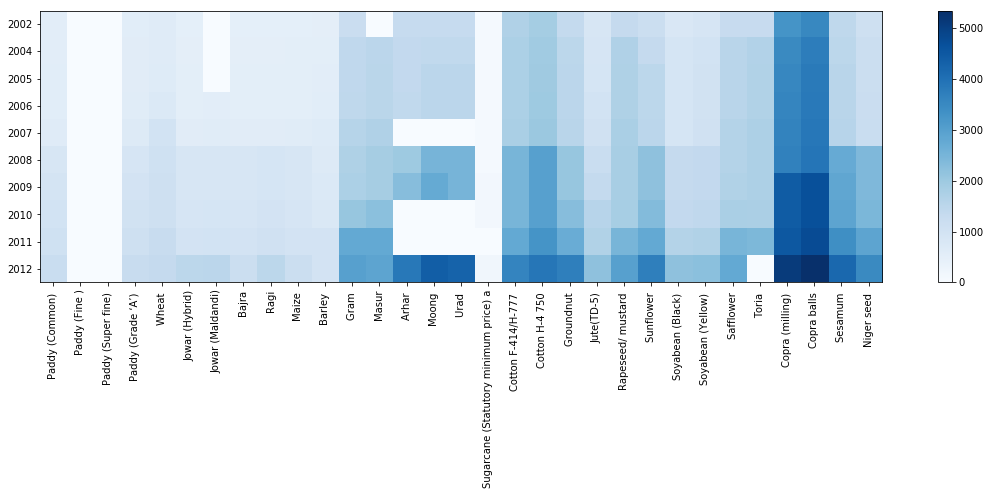

In [7]:
mat1 = np.matrix(crop_price.values[:,1:],dtype='float')
fig = plt.figure(num=2,figsize=(20,5))
ax = fig.add_subplot(1,1,1)
plt.imshow(mat1.T, cmap='Blues')
ax.set_yticks(np.arange(len(crop_price.columns[1:])))
ax.set_xticks(np.arange(len(crop_price.iloc[:,0])))
ax.set_yticklabels(crop_price.columns[1:])
ax.set_xticklabels(crop_price.iloc[:,0],rotation='vertical')
plt.colorbar()
plt.show()

(10, 34)
(10, 33)


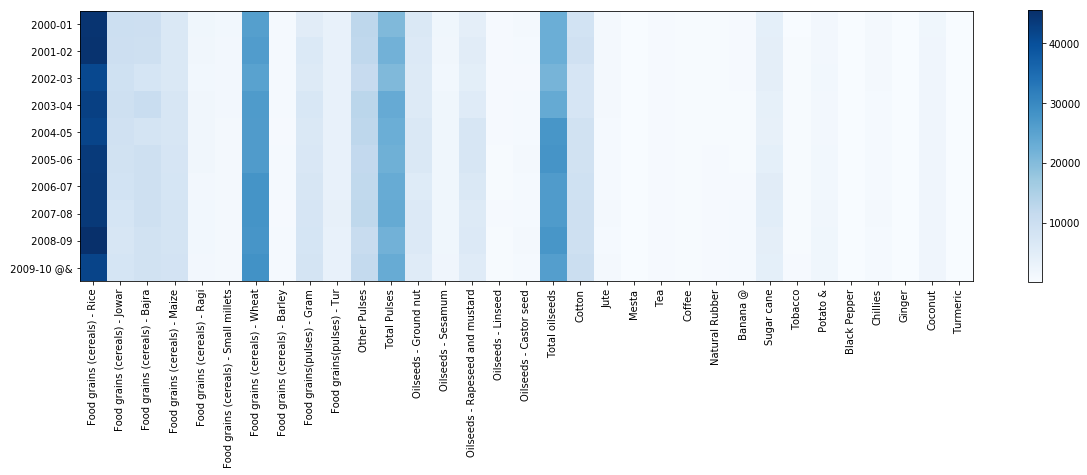

In [8]:
mat2 = np.matrix(area_cult.values[:,1:],dtype='float')
print(mat2.shape)
mat2=np.delete(mat2,12,1)
print(mat2.shape)
fig = plt.figure(num=3,figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(area_cult.columns[1:],12))))
ax.set_yticks(np.arange(len(area_cult.iloc[:,0])))
ax.set_xticklabels(np.delete(area_cult.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult.iloc[:,0])
plt.imshow(mat2, cmap='Blues')
plt.colorbar()
plt.show()

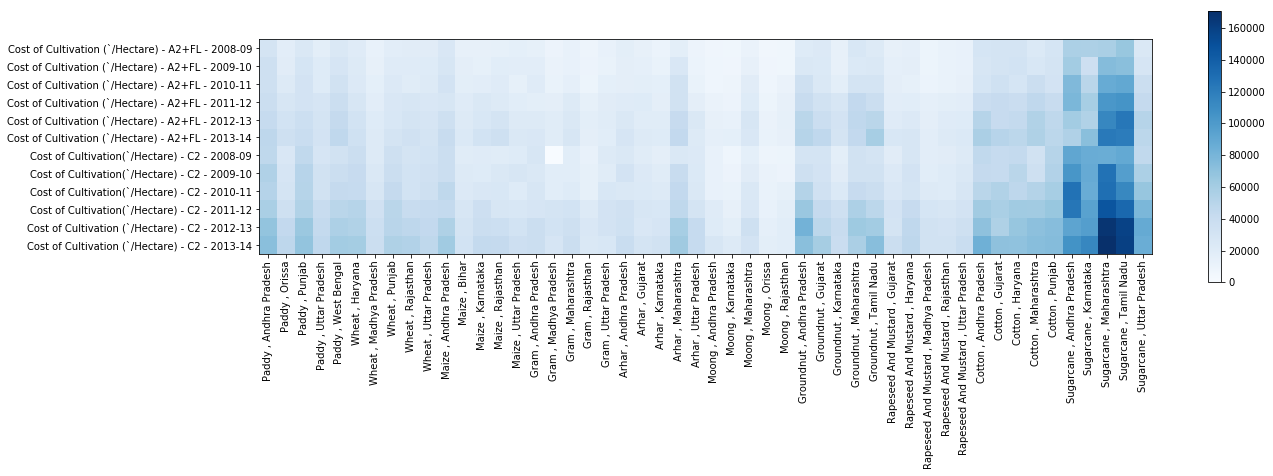

In [9]:
mat3 = np.matrix(culti_cost.values[:,2:14],dtype='float').T
fig = plt.figure(num=3,figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_yticks(np.arange(len(culti_cost.columns[2:14])))
ax.set_xticks(np.arange(len(culti_cost.values[:,0]+' , '+culti_cost.values[:,1])))
ax.set_yticklabels(culti_cost.columns[2:14])
ax.set_xticklabels(culti_cost.values[:,0]+' , '+culti_cost.values[:,1],rotation='vertical')
plt.imshow(mat3, cmap='Blues')
plt.colorbar()
plt.show()

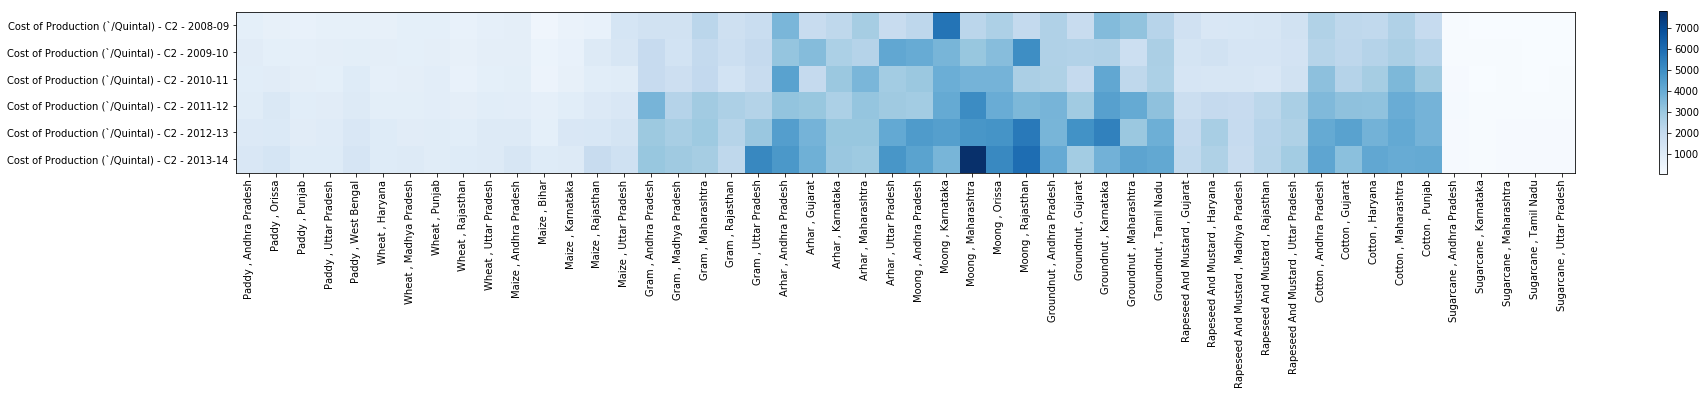

In [10]:
mat4 = np.matrix(culti_cost.values[:,14:],dtype='float').T
fig = plt.figure(num=4,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_yticks(np.arange(len(culti_cost.columns[14:])))
ax.set_xticks(np.arange(len(culti_cost.values[:,0]+' , '+culti_cost.values[:,1])))
ax.set_yticklabels(culti_cost.columns[14:])
ax.set_xticklabels(culti_cost.values[:,0]+' , '+culti_cost.values[:,1],rotation='vertical')
plt.imshow(mat4, cmap='Blues')
plt.colorbar()
plt.show()

In [11]:
temperature = pd.read_csv('Mean_Temperatures.csv',delimiter=',')
temperature.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,2000,24.60,19.33,26.47,27.23,22.68
1,2001,24.73,19.75,26.82,27.47,22.52
2,2002,25.00,19.65,27.22,27.71,22.58
3,2003,24.72,19.82,26.52,27.64,22.23
4,2004,24.74,19.93,27.06,27.33,22.24


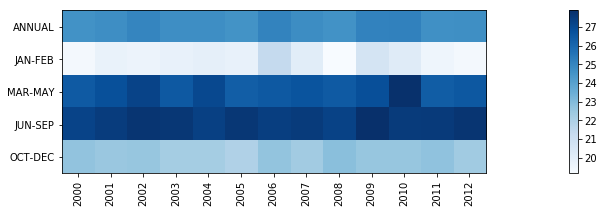

In [12]:
mat5 = np.matrix(temperature.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(temperature.columns[1:])))
ax.set_xticks(np.arange(len(temperature.values[:,0])))
ax.set_yticklabels(temperature.columns[1:])
ax.set_xticklabels(temperature.values[:,0].astype(int),rotation='vertical')
plt.imshow(mat5, cmap='Blues')
plt.colorbar()
plt.show()

In [13]:
rainfall =  pd.read_csv('rainfall_cleaned.csv',delimiter=',')
rainfall.head()

,STATES,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2
1,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9
2,ANDAMAN & NICOBAR ISLANDS,2002,10.6,0.0,11.5,100.2,366.7,358.3,317.4,429.8,420.0,169.0,306.7,129.9,2620.2
3,ANDAMAN & NICOBAR ISLANDS,2003,44.3,7.9,149.2,19.4,296.3,159.9,494.9,379.4,371.9,310.4,74.1,48.0,2355.9
4,ANDAMAN & NICOBAR ISLANDS,2004,54.5,35.9,36.5,41.6,505.1,423.9,378.9,308.7,280.7,223.9,169.9,0.4,2460.1


In [29]:
rainfall1=rainfall.copy()
rainfall1 = rainfall1.groupby(['STATES','YEAR'],as_index=True).mean()
# rainfall1.iloc[:,12].unstack(level=-1).reset_index().head()

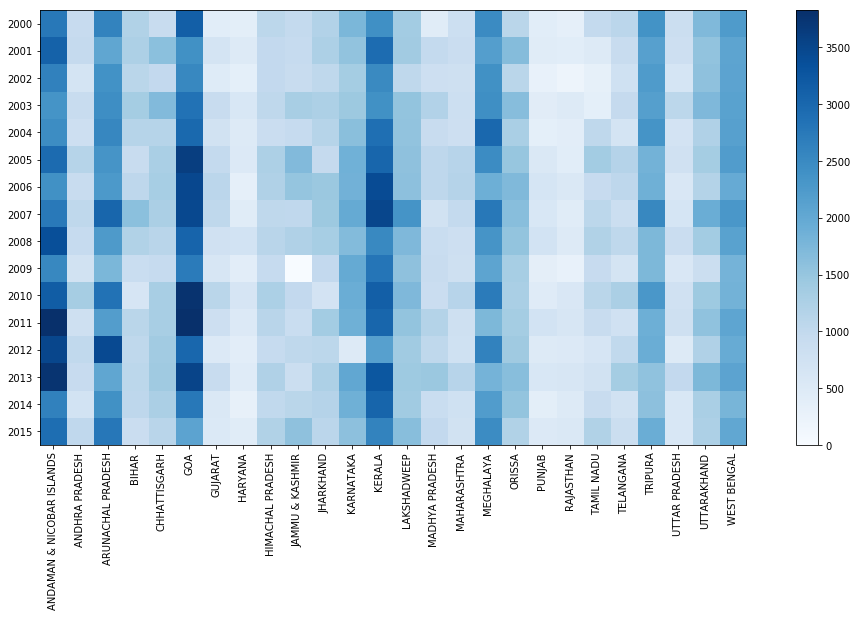

In [30]:
mat6 = np.matrix(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,1:],dtype='float').T
fig = plt.figure(num=6,figsize=(18,8))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])))
ax.set_xticks(np.arange(len(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0])))
ax.set_yticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().columns[1:])
ax.set_xticklabels(rainfall1.iloc[:,12].unstack(level=-1).reset_index().values[:,0],rotation='vertical')
plt.imshow(mat6, cmap='Blues')
plt.colorbar()
plt.show()

In [31]:
growth = pd.read_csv('Avg annual Growth Rate_Major Crops.csv',delimiter = ',')
growth = pd.concat([growth.iloc[:,0],growth.iloc[:,5:]],axis=1,sort=False)
growth = growth.dropna()
growth.head()

,Crop,(Ninth Plan) 1997-98 to 2001-02,(Tenth Plan) 2002-03 to 2006-07,(Eleventh Plan) 2007-08 to 2011-12
0,Wheat,0.7,-0.3,3.0
1,Rice,2.1,1.2,2.2
2,Jowar,0.2,2.1,3.1
3,Bajra,4.9,7.3,8.4
4,Maize,3.1,-0.2,6.5


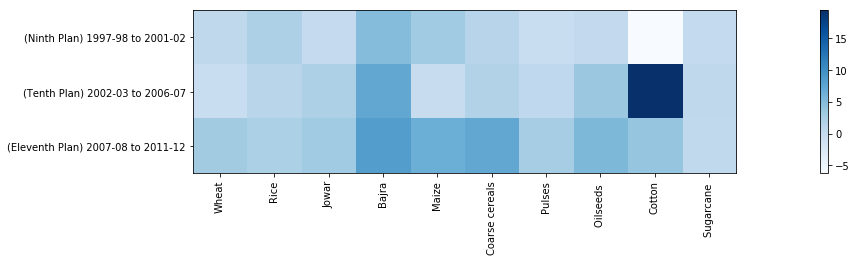

In [32]:
mat7 = np.matrix(growth.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(growth.columns[1:])))
ax.set_xticks(np.arange(len(growth.values[:,0])))
ax.set_yticklabels(growth.columns[1:])
ax.set_xticklabels(growth.values[:,0],rotation='vertical')
plt.imshow(mat7, cmap='Blues')
plt.colorbar()
plt.show()

In [18]:
suicides = pd.read_csv('suicides_10-14.csv',delimiter = ',')
suicides.drop(columns={'Sl. No.','2014 - Labourers'},inplace=True)
suicides.iloc[:,:].fillna(0,inplace=True)
suicides.head()

,State/UT,2010,2011,2012,2013,2014
0,ANDHRA PRADESH,2525.0,2206.0,2572.0,2014.0,160
1,ARUNACHAL PRADESH,18.0,13.0,11.0,37.0,0
2,ASSAM,369.0,312.0,344.0,305.0,21
3,BIHAR,95.0,83.0,68.0,127.0,0
4,CHHATTISGARH,1126.0,0.0,4.0,0.0,443


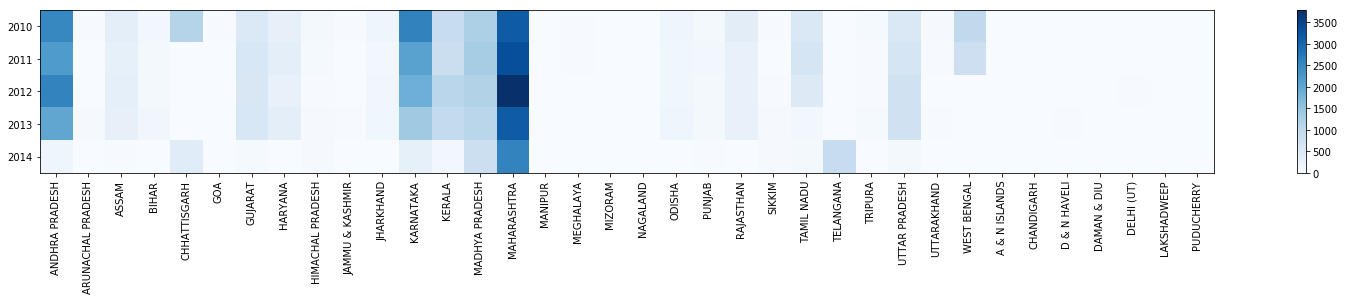

In [19]:
mat8 = np.matrix(suicides.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(suicides.columns[1:])))
ax.set_xticks(np.arange(len(suicides.values[:,0])))
ax.set_yticklabels(suicides.columns[1:])
ax.set_xticklabels(suicides.values[:,0],rotation='vertical')
plt.imshow(mat8, cmap='Blues')
plt.colorbar()
plt.show()